In [1]:
import os
from pathlib import Path
os.chdir("../..")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/mregan/Dev/Litmus-freqtrade


In [2]:
import pandas as pd
import numpy as np
from user_data.litmus import get_labeled_data as ld
from user_data.litmus import meta_model as mm

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [3]:
labeled_data = ld.GetLabeledData(
    strategy_name='VulcanPrimary',  
    config='user_data/strategies/VulcanPrimary.json', 
    bt_filename='backtest-result-2022-04-24_15-28-09.json',
    buy_only=True)


In [4]:
df = labeled_data.run()
df

Getting trade features & buy indicators for 1INCH/USDT


AttributeError: 'VulcanPrimary' object has no attribute 'dataframe_btc_12h'

In [5]:
df['exit_reason'].isna().mean()

0.0003391267486222976

In [6]:
df['exit_reason'].value_counts()

lower_barrier_sl_sell          4474
upper_barrier_pt_sell          3782
vertical_barrier_force_sell    3028
force_exit                      507
Name: exit_reason, dtype: int64

In [7]:
# Tripple barrier target setting method

df['y_true'] = np.nan
df['y_true'] = np.where(df['exit_reason'].isin(['upper_barrier_pt_sell']), True, df['y_true'])
df['y_true'] = np.where(df['exit_reason'].isin(['lower_barrier_sl_sell', 'vertical_barrier_force_sell']), False, df['y_true'])
df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])
df['y_true'].value_counts()

0.0    7502
1.0    3782
Name: y_true, dtype: int64

In [8]:
df['y_pred'] = True

In [ ]:
df.columns.values

In [9]:
# Train ML model to predict 'correct_trade'

features_num = [
       'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch',
       'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index',
       'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff',
       'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind', 'trend_psar_up', 'trend_psar_down',
       'trend_psar_up_indicator', 'trend_psar_down_indicator',
       'momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_roc', 'momentum_ppo',
       'momentum_ppo_signal', 'momentum_ppo_hist', 'momentum_pvo',
       'momentum_pvo_signal', 'momentum_pvo_hist', 'momentum_kama',
       'others_dr', 'others_dlr', 'others_cr', 

       'volume_btc_12h', 'volume_adi_btc_12h', 'volume_obv_btc_12h',
       'volume_cmf_btc_12h', 'volume_fi_btc_12h', 'volume_em_btc_12h',
       'volume_sma_em_btc_12h', 'volume_vpt_btc_12h',
       'volume_vwap_btc_12h', 'volume_mfi_btc_12h', 'volume_nvi_btc_12h',
       'volatility_bbm_btc_12h', 'volatility_bbh_btc_12h',
       'volatility_bbl_btc_12h', 'volatility_bbw_btc_12h',
       'volatility_bbp_btc_12h', 'volatility_bbhi_btc_12h',
       'volatility_bbli_btc_12h', 'volatility_kcc_btc_12h',
       'volatility_kch_btc_12h', 'volatility_kcl_btc_12h',
       'volatility_kcw_btc_12h', 'volatility_kcp_btc_12h',
       'volatility_kchi_btc_12h', 'volatility_kcli_btc_12h',
       'volatility_dcl_btc_12h', 'volatility_dch_btc_12h',
       'volatility_dcm_btc_12h', 'volatility_dcw_btc_12h',
       'volatility_dcp_btc_12h', 'volatility_atr_btc_12h',
       'volatility_ui_btc_12h', 'trend_macd_btc_12h',
       'trend_macd_signal_btc_12h', 'trend_macd_diff_btc_12h',
       'trend_sma_fast_btc_12h', 'trend_sma_slow_btc_12h',
       'trend_ema_fast_btc_12h', 'trend_ema_slow_btc_12h',
       'trend_vortex_ind_pos_btc_12h', 'trend_vortex_ind_neg_btc_12h',
       'trend_vortex_ind_diff_btc_12h', 'trend_trix_btc_12h',
       'trend_mass_index_btc_12h', 'trend_dpo_btc_12h',
       'trend_kst_btc_12h', 'trend_kst_sig_btc_12h',
       'trend_kst_diff_btc_12h', 
       'trend_stc_btc_12h',
       'trend_adx_btc_12h', 'trend_adx_pos_btc_12h',
       'trend_adx_neg_btc_12h', 'trend_cci_btc_12h',
       'trend_aroon_up_btc_12h',
       'trend_aroon_down_btc_12h', 'trend_aroon_ind_btc_12h',
       'trend_psar_up_btc_12h', 'trend_psar_down_btc_12h',
       'trend_psar_up_indicator_btc_12h',
       'trend_psar_down_indicator_btc_12h', 'momentum_rsi_btc_12h',
       'momentum_stoch_rsi_btc_12h', 'momentum_stoch_rsi_k_btc_12h',
       'momentum_stoch_rsi_d_btc_12h', 'momentum_tsi_btc_12h',
       'momentum_uo_btc_12h', 'momentum_stoch_btc_12h',
       'momentum_stoch_signal_btc_12h', 'momentum_wr_btc_12h',
       'momentum_ao_btc_12h', 'momentum_roc_btc_12h',
       'momentum_ppo_btc_12h', 'momentum_ppo_signal_btc_12h',
       'momentum_ppo_hist_btc_12h', 'momentum_pvo_btc_12h',
       'momentum_pvo_signal_btc_12h', 'momentum_pvo_hist_btc_12h',
       'momentum_kama_btc_12h', 'others_dr_btc_12h', 'others_dlr_btc_12h',
       'others_cr_btc_12h']

k_best_features = ['trend_macd_diff_btc_12h',
       'trend_kst_diff_btc_12h',
       'momentum_kama_btc_12h',
       'trend_mass_index_btc_12h',
       'volatility_kcw_btc_12h',
       'trend_psar_down_indicator',
       'momentum_uo_btc_12h',
       'trend_psar_down_btc_12h', 'volatility_kchi',
       'trend_psar_down_indicator_btc_12h',
       'momentum_pvo_signal_btc_12h',
       'volatility_bbw_btc_12h',
       'volatility_dch_btc_12h',
       'volatility_bbm_btc_12h',
       'volume_vwap_btc_12h',
       'volatility_dcw_btc_12h', 'volume_fi',
       'momentum_roc', 'momentum_wr',
       'momentum_ppo_hist', 'trend_aroon_down',
       'volatility_kcc_btc_12h',
       'trend_psar_up_indicator', 'volatility_kch']


In [10]:
# Drop BTC

df = df.drop('BTC/USDT', level=0, axis=0)

In [11]:
# Add dummy cat feature
df['pair_dummy'] = 'Dummy'

In [135]:
# Limit training data so we can backest with holdout

model = mm.MetaModel(data=df.loc[df.date < '2021-06-01'], 
                     X_features_num=k_best_features,
                     X_features_cat=['pair_copy'],
                     y_pred_col='y_pred', 
                     y_true_col='y_true',
                     sample_weight_col='profit_ratio')

In [136]:
model.check_data()

No NaNs found in the DataFrame. Ready to train meta model.


In [137]:
model.clean_data()

Removed 0 NaN / Infinity observations from DataFrame


In [138]:
model.eval_primary_model()

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3874
         1.0       0.40      1.00      0.57      2620

    accuracy                           0.40      6494
   macro avg       0.20      0.50      0.29      6494
weighted avg       0.16      0.40      0.23      6494

Note: The proportion of positive to negative classes is 0.4034


In [139]:
model.run_cross_validation(cv_n_splits=3, cv_gap=40)

Train: 2017-09-25 2020-04-03 Test: 2020-04-09 2020-11-09
Train: 2019-12-18 2020-11-08 Test: 2020-11-09 2021-02-15
Train: 2020-08-08 2021-02-08 Test: 2021-02-15 2021-05-31


In [140]:
model.cv_classification_report()

              precision    recall  f1-score   support

         0.0       0.48      0.59      0.53      2617
         1.0       0.35      0.26      0.30      2252

    accuracy                           0.44      4869
   macro avg       0.42      0.42      0.41      4869
weighted avg       0.42      0.44      0.42      4869



In [141]:
model.get_most_important_features(cv_n_splits=3, cv_gap=40, cv_sample=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

KeyError: None

In [ ]:
model.most_important_features_idx

In [ ]:
model.plot_feature_selection(figsize=(50, 8))

In [ ]:
best_features_df = pd.DataFrame.from_dict(model.clf.named_steps['feature_selection'].get_metric_dict()).T
best_features_df

In [ ]:
model.X_transformed_features[[best_features_df.iloc[27]['feature_idx']]]

In [ ]:
top_features = []
prev_features = []

for k, v in model.clf.named_steps['feature_selection'].subsets_.items():
    current_features = list(v['feature_idx'])
    current_features = [i for i in current_features if i not in prev_features]
    top_features += current_features
    print(top_features)
    prev_features = list(v['feature_idx'])

In [ ]:
model.X_transformed_features[[top_features[:30]]]

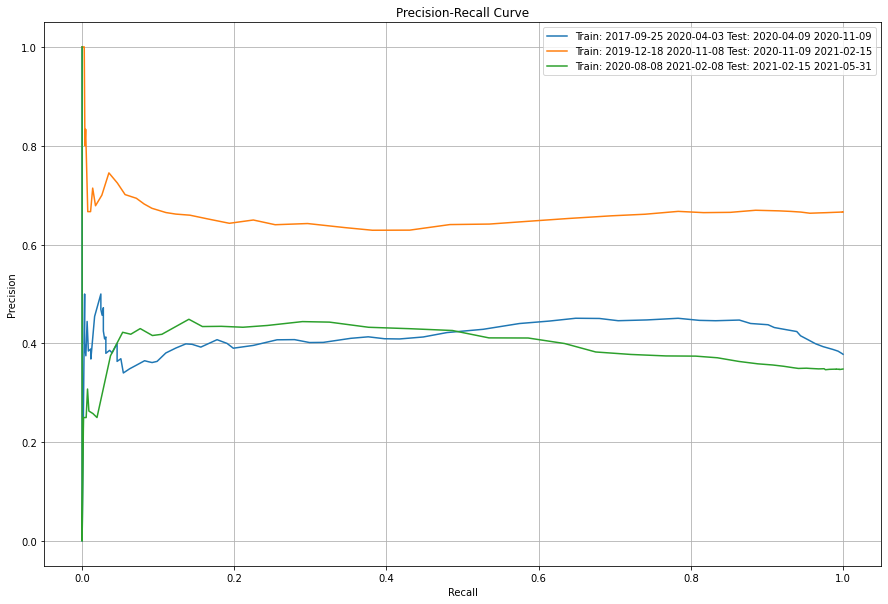

In [18]:
model.plot_precision_recall_curve()

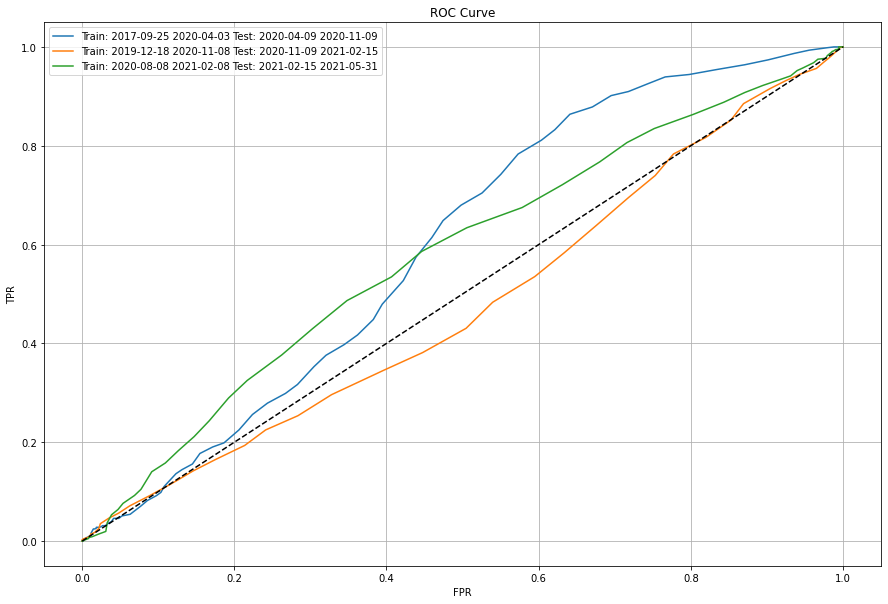

In [19]:
model.plot_roc_curve()

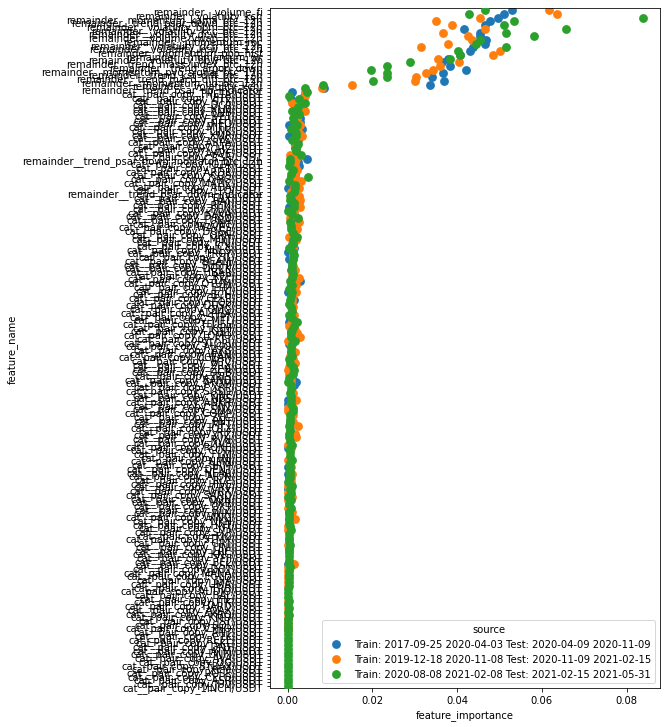

In [20]:
model.plot_feature_importance()

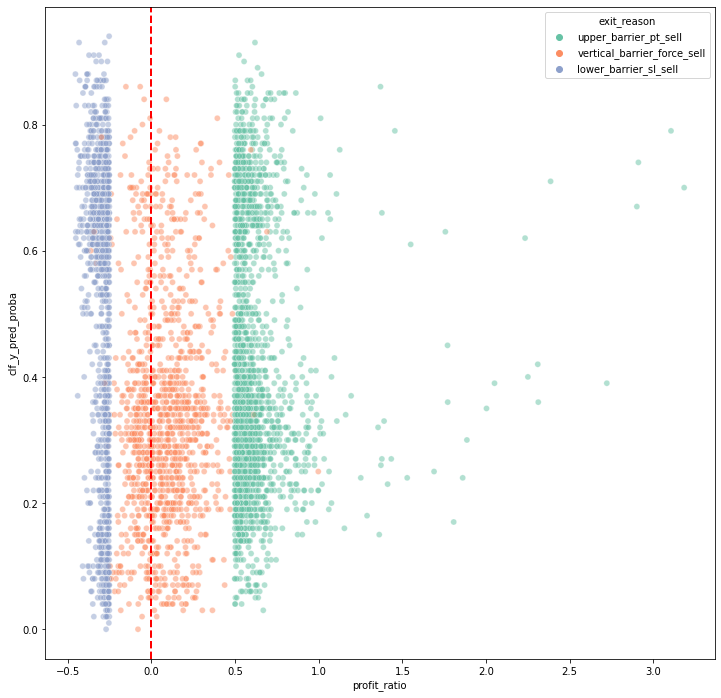

In [21]:
model.plot_probability_returns_scatter()

In [22]:
model.probability_returns_table()

,mean,median,count
clf_y_pred_proba_bin,,,
0.0,-0.025316,-0.191110,240
1.0,0.179941,0.113894,464
2.0,0.371427,0.514824,977
3.0,0.351959,0.509507,1030
4.0,0.333859,0.504170,411
5.0,0.101350,0.039578,306
6.0,0.027585,-0.260587,785
7.0,0.130402,-0.100546,515
8.0,0.112161,-0.256202,129


In [142]:
model.run_train_on_all_data()

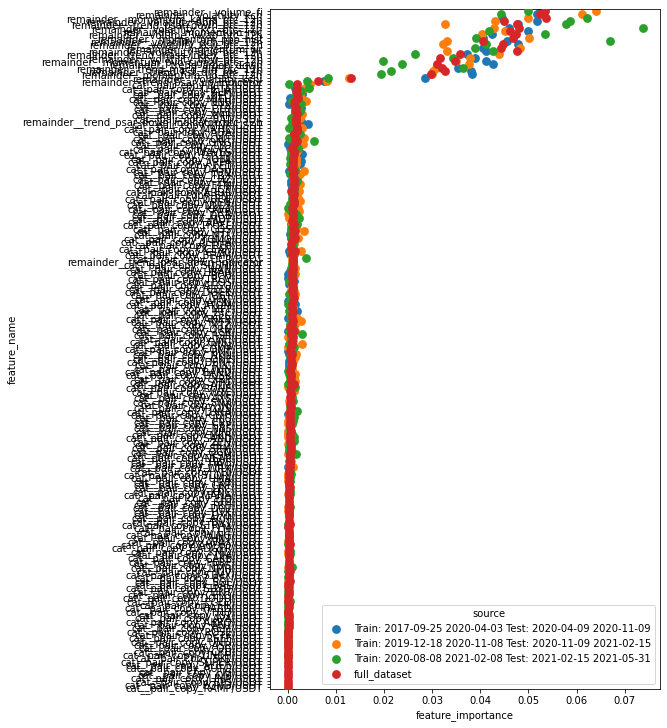

In [143]:
model.plot_feature_importance()

In [25]:
model.model_threshold_table()

,precision,recall,precision,recall,precision,recall,precision_avg,recall_avg
threshold,,,,,,,,
0.03,0.378026,1.000000,NaN,NaN,NaN,NaN,0.378026,1.000000
0.04,0.379763,0.998358,NaN,NaN,NaN,NaN,0.379763,0.998358
0.05,0.384371,0.993432,NaN,NaN,NaN,NaN,0.384371,0.993432
0.06,0.387742,0.986864,NaN,NaN,NaN,NaN,0.387742,0.986864
0.07,0.393497,0.973727,NaN,NaN,NaN,NaN,0.393497,0.973727
0.08,0.399320,0.963875,NaN,NaN,NaN,NaN,0.399320,0.963875
0.09,0.407433,0.954023,NaN,NaN,NaN,NaN,0.407433,0.954023
0.10,0.415462,0.944171,0.665845,1.000000,NaN,NaN,0.540654,0.972085
0.11,0.424018,0.939245,0.665638,0.999074,NaN,NaN,0.544828,0.969159


In [144]:
model.set_model_threshold(model_threshold=0.1)

In [145]:
model.save_model(filename='VulcanMeta')

# Appendix / Testing (to be deleted)

In [ ]:
model.data.loc['SOL/USDT', :][['clf_y_pred_proba', 'exit_reason', 'profit_ratio']]

In [35]:
model.clf.predict_proba(model.data[model.X_features])[:, 1]

array([0.99, 0.96, 0.21, ..., 0.02, 0.02, 0.  ])

In [62]:
test = model.data.iloc[0:3, :][model.X_features]
test

trend_macd_diff_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00              -219.549902   
           2021-03-08 12:00:00+00:00               364.489946   
           2021-03-17 00:00:00+00:00              -478.358066   

                                      trend_kst_diff_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00              -54.170712   
           2021-03-08 12:00:00+00:00               22.788575   
           2021-03-17 00:00:00+00:00               12.796300   

                                      momentum_kama_btc_12h  \
pair       date                                               
1INCH/USDT 2021-01-25 12:00:00+00:00           34259.503340   
           2021-03-08 12:00:00+00:00           49999.138352   
           2021-03-17 00:00:00+00:00           58490.275255   

                                      trend_mass_index_btc_12h  \
pair       date                                                  
1INCH/USDT 2021-01-25 12:00:00+00:00                 23.326202   
           2021-03-08 12:00:00+00:00                 23.390203   
           2021-03-17 00:00:00+00:00                 24.670055   

                                      volatility_kcw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               14.431267   
           2021-03-08 12:00:00+00:00                9.335805   
           2021-03-17 00:00:00+00:00               10.529895   

                                      trend_psar_down_indicator  \
pair       date                                                   
1INCH/USDT 2021-01-25 12:00:00+00:00                        0.0   
           2021-03-08 12:00:00+00:00                        0.0   
           2021-03-17 00:00:00+00:00                        0.0   

                                      momentum_uo_btc_12h  \
pair       date                                             
1INCH/USDT 2021-01-25 12:00:00+00:00            47.095017   
           2021-03-08 12:00:00+00:00            63.949261   
           2021-03-17 00:00:00+00:00            45.923308   

                                      trend_psar_down_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00             33987.994206   
           2021-03-08 12:00:00+00:00             49488.013548   
           2021-03-17 00:00:00+00:00             60907.531068   

                                      volatility_kchi  \
pair       date                                         
1INCH/USDT 2021-01-25 12:00:00+00:00              1.0   
           2021-03-08 12:00:00+00:00              1.0   
           2021-03-17 00:00:00+00:00              0.0   

                                      trend_psar_down_indicator_btc_12h  \
pair       date                                                           
1INCH/USDT 2021-01-25 12:00:00+00:00                                0.0   
           2021-03-08 12:00:00+00:00                                0.0   
           2021-03-17 00:00:00+00:00                                0.0   

                                      momentum_pvo_signal_btc_12h  \
pair       date                                                     
1INCH/USDT 2021-01-25 12:00:00+00:00                    -7.236101   
           2021-03-08 12:00:00+00:00                    -9.151144   
           2021-03-17 00:00:00+00:00                    -0.361926   

                                      volatility_bbw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               24.623738   
           2021-03-08 12:00:00+00:00               15.812984   
           2021-03-17 00:00:00+00:00               19.617447   

                                      volatility_dch_btc_12h  \
pair       date                                               

In [63]:
nan_test = model.data.iloc[0:3, :][model.X_features].copy()
nan_test[:] = np.nan
nan_test

trend_macd_diff_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00                      NaN   
           2021-03-08 12:00:00+00:00                      NaN   
           2021-03-17 00:00:00+00:00                      NaN   

                                      trend_kst_diff_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                     NaN   
           2021-03-08 12:00:00+00:00                     NaN   
           2021-03-17 00:00:00+00:00                     NaN   

                                      momentum_kama_btc_12h  \
pair       date                                               
1INCH/USDT 2021-01-25 12:00:00+00:00                    NaN   
           2021-03-08 12:00:00+00:00                    NaN   
           2021-03-17 00:00:00+00:00                    NaN   

                                      trend_mass_index_btc_12h  \
pair       date                                                  
1INCH/USDT 2021-01-25 12:00:00+00:00                       NaN   
           2021-03-08 12:00:00+00:00                       NaN   
           2021-03-17 00:00:00+00:00                       NaN   

                                      volatility_kcw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                     NaN   
           2021-03-08 12:00:00+00:00                     NaN   
           2021-03-17 00:00:00+00:00                     NaN   

                                      trend_psar_down_indicator  \
pair       date                                                   
1INCH/USDT 2021-01-25 12:00:00+00:00                        NaN   
           2021-03-08 12:00:00+00:00                        NaN   
           2021-03-17 00:00:00+00:00                        NaN   

                                      momentum_uo_btc_12h  \
pair       date                                             
1INCH/USDT 2021-01-25 12:00:00+00:00                  NaN   
           2021-03-08 12:00:00+00:00                  NaN   
           2021-03-17 00:00:00+00:00                  NaN   

                                      trend_psar_down_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00                      NaN   
           2021-03-08 12:00:00+00:00                      NaN   
           2021-03-17 00:00:00+00:00                      NaN   

                                      volatility_kchi  \
pair       date                                         
1INCH/USDT 2021-01-25 12:00:00+00:00              NaN   
           2021-03-08 12:00:00+00:00              NaN   
           2021-03-17 00:00:00+00:00              NaN   

                                      trend_psar_down_indicator_btc_12h  \
pair       date                                                           
1INCH/USDT 2021-01-25 12:00:00+00:00                                NaN   
           2021-03-08 12:00:00+00:00                                NaN   
           2021-03-17 00:00:00+00:00                                NaN   

                                      momentum_pvo_signal_btc_12h  \
pair       date                                                     
1INCH/USDT 2021-01-25 12:00:00+00:00                          NaN   
           2021-03-08 12:00:00+00:00                          NaN   
           2021-03-17 00:00:00+00:00                          NaN   

                                      volatility_bbw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                     NaN   
           2021-03-08 12:00:00+00:00                     NaN   
           2021-03-17 00:00:00+00:00                     NaN   

                                      volatility_dch_btc_12h  \
pair       date                                               

In [64]:
model.clf.predict_proba(nan_test)[:, 1]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [70]:
some_nan_test = model.data.iloc[0:3, :][model.X_features].copy()
some_nan_test.iloc[:, 3] = np.nan
some_nan_test

trend_macd_diff_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00              -219.549902   
           2021-03-08 12:00:00+00:00               364.489946   
           2021-03-17 00:00:00+00:00              -478.358066   

                                      trend_kst_diff_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00              -54.170712   
           2021-03-08 12:00:00+00:00               22.788575   
           2021-03-17 00:00:00+00:00               12.796300   

                                      momentum_kama_btc_12h  \
pair       date                                               
1INCH/USDT 2021-01-25 12:00:00+00:00           34259.503340   
           2021-03-08 12:00:00+00:00           49999.138352   
           2021-03-17 00:00:00+00:00           58490.275255   

                                      trend_mass_index_btc_12h  \
pair       date                                                  
1INCH/USDT 2021-01-25 12:00:00+00:00                       NaN   
           2021-03-08 12:00:00+00:00                       NaN   
           2021-03-17 00:00:00+00:00                       NaN   

                                      volatility_kcw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               14.431267   
           2021-03-08 12:00:00+00:00                9.335805   
           2021-03-17 00:00:00+00:00               10.529895   

                                      trend_psar_down_indicator  \
pair       date                                                   
1INCH/USDT 2021-01-25 12:00:00+00:00                        0.0   
           2021-03-08 12:00:00+00:00                        0.0   
           2021-03-17 00:00:00+00:00                        0.0   

                                      momentum_uo_btc_12h  \
pair       date                                             
1INCH/USDT 2021-01-25 12:00:00+00:00            47.095017   
           2021-03-08 12:00:00+00:00            63.949261   
           2021-03-17 00:00:00+00:00            45.923308   

                                      trend_psar_down_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00             33987.994206   
           2021-03-08 12:00:00+00:00             49488.013548   
           2021-03-17 00:00:00+00:00             60907.531068   

                                      volatility_kchi  \
pair       date                                         
1INCH/USDT 2021-01-25 12:00:00+00:00              1.0   
           2021-03-08 12:00:00+00:00              1.0   
           2021-03-17 00:00:00+00:00              0.0   

                                      trend_psar_down_indicator_btc_12h  \
pair       date                                                           
1INCH/USDT 2021-01-25 12:00:00+00:00                                0.0   
           2021-03-08 12:00:00+00:00                                0.0   
           2021-03-17 00:00:00+00:00                                0.0   

                                      momentum_pvo_signal_btc_12h  \
pair       date                                                     
1INCH/USDT 2021-01-25 12:00:00+00:00                    -7.236101   
           2021-03-08 12:00:00+00:00                    -9.151144   
           2021-03-17 00:00:00+00:00                    -0.361926   

                                      volatility_bbw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               24.623738   
           2021-03-08 12:00:00+00:00               15.812984   
           2021-03-17 00:00:00+00:00               19.617447   

                                      volatility_dch_btc_12h  \
pair       date                                               

In [71]:
model.clf.predict_proba(some_nan_test)[:, 1]

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [73]:
ii = mm.InfinityImputer()

In [74]:
ii.transform(some_nan_test)

array([[-219.54990187656165, -54.170711902762754, 34259.50334045004, nan,
        14.431267480915189, 0.0, 47.095016731786366, 33987.99420612896,
        1.0, 0.0, -7.2361006983618354, 24.623738126881374, 37950.0,
        34143.3755, 33052.66558861676, 26.652315029602153,
        633954.9351603722, 24.098921336490406, -27.62283181783446,
        2.9771767522895587, 4.0, 32291.287, 0.0, 2.3089633333333337,
        '1INCH/USDT'],
       [364.48994629859715, 22.78857460217514, 49999.13835161463, nan,
        9.335805217218347, 0.0, 63.949260514338576, 49488.01354770763,
        1.0, 0.0, -9.151144476381159, 15.812984260310964, 52640.0,
        48798.3845, 49567.90017815116, 19.75475233201624,
        578660.471635762, 7.887843939431742, -14.933417882054465,
        1.3581116720557005, 4.0, 49439.93466666667, 0.0,
        4.206463333333334, '1INCH/USDT'],
       [-478.35806601602803, 12.796300028485035, 58490.27525473493, nan,
        10.529895471177076, 0.0, 45.923307848704084, 60907.5310

In [83]:
np.nan_to_num(some_nan_test, copy=False)

array([[-219.54990187656165, -54.170711902762754, 34259.50334045004, nan,
        14.431267480915189, 0.0, 47.095016731786366, 33987.99420612896,
        1.0, 0.0, -7.2361006983618354, 24.623738126881374, 37950.0,
        34143.3755, 33052.66558861676, 26.652315029602153,
        633954.9351603722, 24.098921336490406, -27.62283181783446,
        2.9771767522895587, 4.0, 32291.287, 0.0, 2.3089633333333337,
        '1INCH/USDT'],
       [364.48994629859715, 22.78857460217514, 49999.13835161463, nan,
        9.335805217218347, 0.0, 63.949260514338576, 49488.01354770763,
        1.0, 0.0, -9.151144476381159, 15.812984260310964, 52640.0,
        48798.3845, 49567.90017815116, 19.75475233201624,
        578660.471635762, 7.887843939431742, -14.933417882054465,
        1.3581116720557005, 4.0, 49439.93466666667, 0.0,
        4.206463333333334, '1INCH/USDT'],
       [-478.35806601602803, 12.796300028485035, 58490.27525473493, nan,
        10.529895471177076, 0.0, 45.923307848704084, 60907.5310

In [88]:
some_nan_test.fillna(999)

trend_macd_diff_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00              -219.549902   
           2021-03-08 12:00:00+00:00               364.489946   
           2021-03-17 00:00:00+00:00              -478.358066   

                                      trend_kst_diff_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00              -54.170712   
           2021-03-08 12:00:00+00:00               22.788575   
           2021-03-17 00:00:00+00:00               12.796300   

                                      momentum_kama_btc_12h  \
pair       date                                               
1INCH/USDT 2021-01-25 12:00:00+00:00           34259.503340   
           2021-03-08 12:00:00+00:00           49999.138352   
           2021-03-17 00:00:00+00:00           58490.275255   

                                      trend_mass_index_btc_12h  \
pair       date                                                  
1INCH/USDT 2021-01-25 12:00:00+00:00                     999.0   
           2021-03-08 12:00:00+00:00                     999.0   
           2021-03-17 00:00:00+00:00                     999.0   

                                      volatility_kcw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               14.431267   
           2021-03-08 12:00:00+00:00                9.335805   
           2021-03-17 00:00:00+00:00               10.529895   

                                      trend_psar_down_indicator  \
pair       date                                                   
1INCH/USDT 2021-01-25 12:00:00+00:00                        0.0   
           2021-03-08 12:00:00+00:00                        0.0   
           2021-03-17 00:00:00+00:00                        0.0   

                                      momentum_uo_btc_12h  \
pair       date                                             
1INCH/USDT 2021-01-25 12:00:00+00:00            47.095017   
           2021-03-08 12:00:00+00:00            63.949261   
           2021-03-17 00:00:00+00:00            45.923308   

                                      trend_psar_down_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00             33987.994206   
           2021-03-08 12:00:00+00:00             49488.013548   
           2021-03-17 00:00:00+00:00             60907.531068   

                                      volatility_kchi  \
pair       date                                         
1INCH/USDT 2021-01-25 12:00:00+00:00              1.0   
           2021-03-08 12:00:00+00:00              1.0   
           2021-03-17 00:00:00+00:00              0.0   

                                      trend_psar_down_indicator_btc_12h  \
pair       date                                                           
1INCH/USDT 2021-01-25 12:00:00+00:00                                0.0   
           2021-03-08 12:00:00+00:00                                0.0   
           2021-03-17 00:00:00+00:00                                0.0   

                                      momentum_pvo_signal_btc_12h  \
pair       date                                                     
1INCH/USDT 2021-01-25 12:00:00+00:00                    -7.236101   
           2021-03-08 12:00:00+00:00                    -9.151144   
           2021-03-17 00:00:00+00:00                    -0.361926   

                                      volatility_bbw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00               24.623738   
           2021-03-08 12:00:00+00:00               15.812984   
           2021-03-17 00:00:00+00:00               19.617447   

                                      volatility_dch_btc_12h  \
pair       date                                               

In [93]:
np.where(pd.isna(nan_test), 999, some_nan_test)

array([[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999,
        999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999],
       [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999,
        999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999],
       [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999,
        999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999]],
      dtype=object)

In [94]:
np.isinf(nan_test)

trend_macd_diff_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00                    False   
           2021-03-08 12:00:00+00:00                    False   
           2021-03-17 00:00:00+00:00                    False   

                                      trend_kst_diff_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                   False   
           2021-03-08 12:00:00+00:00                   False   
           2021-03-17 00:00:00+00:00                   False   

                                      momentum_kama_btc_12h  \
pair       date                                               
1INCH/USDT 2021-01-25 12:00:00+00:00                  False   
           2021-03-08 12:00:00+00:00                  False   
           2021-03-17 00:00:00+00:00                  False   

                                      trend_mass_index_btc_12h  \
pair       date                                                  
1INCH/USDT 2021-01-25 12:00:00+00:00                     False   
           2021-03-08 12:00:00+00:00                     False   
           2021-03-17 00:00:00+00:00                     False   

                                      volatility_kcw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                   False   
           2021-03-08 12:00:00+00:00                   False   
           2021-03-17 00:00:00+00:00                   False   

                                      trend_psar_down_indicator  \
pair       date                                                   
1INCH/USDT 2021-01-25 12:00:00+00:00                      False   
           2021-03-08 12:00:00+00:00                      False   
           2021-03-17 00:00:00+00:00                      False   

                                      momentum_uo_btc_12h  \
pair       date                                             
1INCH/USDT 2021-01-25 12:00:00+00:00                False   
           2021-03-08 12:00:00+00:00                False   
           2021-03-17 00:00:00+00:00                False   

                                      trend_psar_down_btc_12h  \
pair       date                                                 
1INCH/USDT 2021-01-25 12:00:00+00:00                    False   
           2021-03-08 12:00:00+00:00                    False   
           2021-03-17 00:00:00+00:00                    False   

                                      volatility_kchi  \
pair       date                                         
1INCH/USDT 2021-01-25 12:00:00+00:00            False   
           2021-03-08 12:00:00+00:00            False   
           2021-03-17 00:00:00+00:00            False   

                                      trend_psar_down_indicator_btc_12h  \
pair       date                                                           
1INCH/USDT 2021-01-25 12:00:00+00:00                              False   
           2021-03-08 12:00:00+00:00                              False   
           2021-03-17 00:00:00+00:00                              False   

                                      momentum_pvo_signal_btc_12h  \
pair       date                                                     
1INCH/USDT 2021-01-25 12:00:00+00:00                        False   
           2021-03-08 12:00:00+00:00                        False   
           2021-03-17 00:00:00+00:00                        False   

                                      volatility_bbw_btc_12h  \
pair       date                                                
1INCH/USDT 2021-01-25 12:00:00+00:00                   False   
           2021-03-08 12:00:00+00:00                   False   
           2021-03-17 00:00:00+00:00                   False   

                                      volatility_dch_btc_12h  \
pair       date                                               

In [134]:
w = np.where(pd.isna(some_nan_test.values), 999, some_nan_test.values)
w

array([[-219.54990187656165, -54.170711902762754, 34259.50334045004, 999,
        14.431267480915189, 0.0, 47.095016731786366, 33987.99420612896,
        1.0, 0.0, -7.2361006983618354, 24.623738126881374, 37950.0,
        34143.3755, 33052.66558861676, 26.652315029602153,
        633954.9351603722, 24.098921336490406, -27.62283181783446,
        2.9771767522895587, 4.0, 32291.287, 0.0, 2.3089633333333337,
        '1INCH/USDT'],
       [364.48994629859715, 22.78857460217514, 49999.13835161463, 999,
        9.335805217218347, 0.0, 63.949260514338576, 49488.01354770763,
        1.0, 0.0, -9.151144476381159, 15.812984260310964, 52640.0,
        48798.3845, 49567.90017815116, 19.75475233201624,
        578660.471635762, 7.887843939431742, -14.933417882054465,
        1.3581116720557005, 4.0, 49439.93466666667, 0.0,
        4.206463333333334, '1INCH/USDT'],
       [-478.35806601602803, 12.796300028485035, 58490.27525473493, 999,
        10.529895471177076, 0.0, 45.923307848704084, 60907.5310

In [147]:
df.to_csv('all_long_trades_vulcan.csv')